In [1]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 891.9 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=754e97e33b077a3bf4764252f0d6c75384ebbf6abd3abfe0f409978602f329ff
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [198]:
from pandas import read_excel

In [217]:
data = read_excel('/kaggle/input/basket-analysis/Basket Analysis - Data.xlsx')

In [218]:
data.head()

,Transaction Date,Customer ID,Product Description
0,2014-01-01,1249,citrus fruit
1,2014-01-01,1249,coffee
2,2014-01-01,1249,italian sausage
3,2014-01-01,1249,sausage
4,2014-01-01,1381,curd


**Processing Data**

In [226]:
class Processing_cluster():
    def __init__(self,data):
        from sklearn.feature_extraction.text import TfidfVectorizer
        self.data_first = data
        self.tfidf = TfidfVectorizer()
    
    def vectorizing(self):
        data = self.data_first
        self.data_second = self.tfidf.fit_transform(data['products']).toarray()
        return self.data_second
    def similarity(self):
        from sklearn.metrics.pairwise import cosine_similarity
        data = self.data_second
        self.data_final = cosine_similarity(data.T)
        return self.data_final

In [205]:
class ProcessingData():
    def __init__(self,data):
        from sentence_transformers import SentenceTransformer
        self.data_first = data
        self.embadding = SentenceTransformer('all-MiniLM-L6-v2')
        self.data_second = []
        self.data_final = []
        from sklearn.feature_extraction.text import TfidfVectorizer
        self.tfidf = TfidfVectorizer()
        self.item = []
        self.data_sec = []
        self.data_finall = []
        def itemDefinise(self):
        from re import sub
        from pandas import DataFrame
        import nltk
        from nltk.corpus import stopwords
        nltk.download('stopwords')
        from nltk.stem import WordNetLemmatizer 
        nltk.download('wordnet')
        data = self.data_first
        ID=data["Customer ID"].unique()
        ID.tolist()
        ID.sort()
        item=data.groupby("Customer ID")["Product Description"].apply(list)
        items=[]
        for i in range(data["Customer ID"].nunique()):
            items.append(item.iloc[i])
        basket=DataFrame({"item":ID,"products":items})
        basket['products'] = basket['products'].astype(str)
        regex = r'[\[\]/,]'
        basket['products'] = basket['products'].apply(lambda x: sub(regex, '', x))
        basket['products'] = basket['products'].apply(lambda x: sub(r'(\w+)\s(\w+)', r'\1_\2', x))
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()
        def preprocess(data):
            preprocessed_data = []
            for products in data:
                products = products.split()
                products = [lemmatizer.lemmatize(p) for p in products if p not in stop_words]
                preprocessed_data.append(" ".join(products))
            return preprocessed_data

        basket['products'] = preprocess(basket['products'])
        self.data_first = basket   
        return self.data_first
    
    def embaddingData(self):
        data = self.data_first
        self.data_second = self.embadding.encode(data['products'])
        return self.data_second
    def normalizeData(self):
        from numpy import linalg
        data = self.data_second
        self.data_final = data /  linalg.norm(data, axis=1, keepdims=True)
        return self.data_final
   
  

In [206]:
processing = ProcessingData(data)

In [207]:
df=processing.itemDefinise()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [208]:
processing.embaddingData()

Batches:   0%|          | 0/122 [00:00<?, ?it/s]

array([[-0.00450351, -0.0309863 ,  0.08224054, ...,  0.07715216,
         0.04119763,  0.04972729],
       [-0.03617382, -0.04126491,  0.05608725, ...,  0.06744412,
         0.06103491,  0.02107737],
       [-0.01458039, -0.02873627,  0.06288667, ...,  0.05138817,
         0.02613186,  0.0168296 ],
       ...,
       [-0.02633186, -0.01989192, -0.12509319, ..., -0.02695356,
         0.15241577,  0.04009001],
       [-0.01595396,  0.00488513,  0.05870152, ...,  0.05360837,
         0.07537383,  0.02331125],
       [-0.0209391 ,  0.00227913, -0.02130201, ...,  0.04651792,
         0.0850602 ,  0.02632425]], dtype=float32)

In [158]:
data = processing.normalizeData()

**Train Data**

In [138]:
class train_Agg():
    def __init__(self):
        from sklearn.cluster import AgglomerativeClustering
        self.AC = AgglomerativeClustering(n_clusters=10, distance_threshold=None)
        
    def trainAgglomerativeClustering(self,data):
        return self.AC.fit(data)
    def silhouette(self,data):
        from sklearn.metrics import silhouette_score
        from numpy import unique
        silhouette_avg = silhouette_score(data, self.AC.labels_)
        print("For n_clusters =", len(unique(self.AC.labels_)), "The average silhouette_score is :", silhouette_avg,"\n\n")
    def elbow_method(self,data):
        from sklearn.cluster import AgglomerativeClustering
        from yellowbrick.cluster import KElbowVisualizer
        model = AgglomerativeClustering()
        # k is range of number of clusters.
        visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
        # Fit data to visualizer
        visualizer.fit(data)
        # Finalize and render figure
        visualizer.show()
    def AgglomerativeClusteringReport(self,df,n_clusters=9):
        from numpy import unique ,where,array
        unique_labels = unique(self.AC.labels_)
        clusters=[]
        for i in unique_labels:
            indices = where(self.AC.labels_ == i)
            cluster = df["item"].iloc[indices].tolist()
            clusters.append(cluster)
        return clusters
    
    def get_cluster_dataframe(self, df, cluster_number):
        cluster_indices = np.where(self.AC.labels_ == cluster_number)
        cluster_df = df.iloc[cluster_indices].reset_index(drop=True)
        cluster_df['cluster'] = cluster_number
        return cluster_df

        

In [139]:
AC = train_Agg()
AC.trainAgglomerativeClustering(data)
AC.silhouette(data)

For n_clusters = 10 The average silhouette_score is : 0.0060033314 




In [140]:
L=AC.AgglomerativeClusteringReport(df)
# cluster_dfs = [AC.get_cluster_dataframe(df, i) for i in range(len(np.unique(AC.AC.labels_)))]
cluster_dfs = AC.get_cluster_dataframe(df,1)


In [231]:
class train_Km():
    def __init__(self):
        from sklearn.cluster import KMeans
        from sklearn.decomposition import PCA
        self.km = KMeans(random_state=0)
        self.pca = PCA(n_components=2)
        
    def trainKMeans(self,data,n_clusters=9):
        self.km.set_params(**{'n_clusters':n_clusters})
        self.km.fit(data)
        from numpy import array
        print(array(self.km.labels_).shape)
    def trainPCA(self,data,n_components=2):
        self.pca.set_params(**{'n_components':n_components})
        pca_result = self.pca.fit_transform(data)
        return pca_result
    def KMeansReport(self,tfidf,n_clusters=9):
        from numpy import array, where
        for i in range(n_clusters):        
            indices = where(self.km.labels_ == i)[0]
            print("Cluster {}: {}".format(i+1, ', '.join(array(tfidf.get_feature_names())[indices].tolist())))
    def silhouette(self,products_similarities,km_labels,n_clusters):
        from sklearn.metrics import silhouette_score
        silhouette_avg = silhouette_score(products_similarities, km_labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
        
        

In [229]:
processing = Processing_cluster(cluster_dfs)
processing.vectorizing()
similarity_matrix = processing.similarity()

In [232]:
kmeans = train_Km()
kmeans.trainKMeans(similarity_matrix,n_clusters=9)
kmeans.km.labels_
kmeans.KMeansReport(processing.tfidf,n_clusters=9)

(176,)
Cluster 1: milk, uht
Cluster 2: appetizer, baby_cosmetics, baking_powder, cake_bar, chewing_gum, chocolate_marshmallow, cling_filmbags, condensed_milk, dish_cleaner, dog_food, flour, flower, frozen_fish, instant_coffee, jam, ketchup, liquor, liver_loaf, male_cosmetics, mayonnaise, pickled_vegetables, pot_plants, ready_soups, rice, roll_products, salt, seasonal_products, seeds, skin_care, sparkling_wine, specialty_cheese, spread_cheese, tea
Cluster 3: bakery_product, beef, berries, brown_bread, butter, candy, canned_fish, cat_food, cereals, chicken, chocolate, coffee, cream_cheese, curd, delete, dessert, detergent, domestic_eggs, frozen_meals, frozen_vegetables, fruitvegetable_juice, grapes, ham, hamburger_meat, hard_cheese, herbs, hygiene_articles, ice_cream, long_life, margarine, meat, misc, napkins, oil, onions, pasta, pork, processed_cheese, redblush_wine, salad_dressing, salty_snack, sauces, sliced_cheese, specialty_bar, specialty_chocolate, sugar, waffles, whippedsour_cream

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [235]:
kmeans.silhouette(similarity_matrix,kmeans.km.labels_,n_clusters=9)

For n_clusters = 9 The average silhouette_score is : 0.07302325626362438


In [236]:
class VisualizationData():
    def __init__(self,data,products_index=[]):
        self.data = data
        self.products_index = products_index
    def pca_2D(self,km,n_clusters=9):
        #importation
        from numpy import where
        from matplotlib.pyplot import figure,scatter,legend,show
        # Plot the results
        figure(figsize=(12,8))
        for i in range(9):
            indices = where(km == i)[0]
            scatter(self.data[indices, 0], self.data[indices, 1], label=f'Cluster {i+1}')
        legend()
        show()
    def pca_3D(self,km,tfidf,n_clusters=9):
        #importation
        from plotly.colors import DEFAULT_PLOTLY_COLORS
        from matplotlib.pyplot import figure
        from numpy import where
        from plotly.graph_objs import Scatter3d,Layout,Figure
        # Plot the results
        fig = figure(figsize=(12,7))
        ax = fig.add_subplot(111, projection='3d')
        offset = 0.1
        data1 = []
        for i in range(9):
            indices = where(km == i)[0]
            trace = Scatter3d(x=self.data[indices, 0], y=self.data[indices, 1], z=self.data[indices, 2], mode='markers',
            marker=dict(size=10, color=DEFAULT_PLOTLY_COLORS[i]),
            text=[tfidf.get_feature_names()[i] for i in indices],
            name=f'Cluster {i+1}')
            data1.append(trace)
        layout = Layout(title='3D Plot',scene=dict(xaxis=dict(title='PC1'), yaxis=dict(title='PC2'), zaxis=dict(title='PC3')))
        fig = Figure(data=data1, layout=layout)
        fig.show()
    
    def Top_10_product(self):
        # Get the index of the products
        products_similarities= self.data
        products_index = self.products_index
        from pandas import DataFrame
        # Create an empty dataframe with 2 columns: 'Product' and 'Similar Products'
        similar = DataFrame(columns=['Product', 'Similar Products'])
        from numpy import argsort
        # Iterate over each product
        for i, product in enumerate(products_index):
            # Get the indices of the top 10 similar products
            top_10_similar_indices = argsort(-self.data[i])[:10]
            # Get the names of the top 10 similar products
            top_10_similar_products = [self.products_index[index] for index in top_10_similar_indices]
            # Add a new row to the dataframe with the product name and its top 10 similar products
            similar = similar.append({'Product': product, 'Similar Products': top_10_similar_products}, ignore_index=True)
        return similar

In [237]:
pca_2 = TrainData()
resulta_pca_2 = pca_2.trainPCA(similarity_matrix,n_components=2)

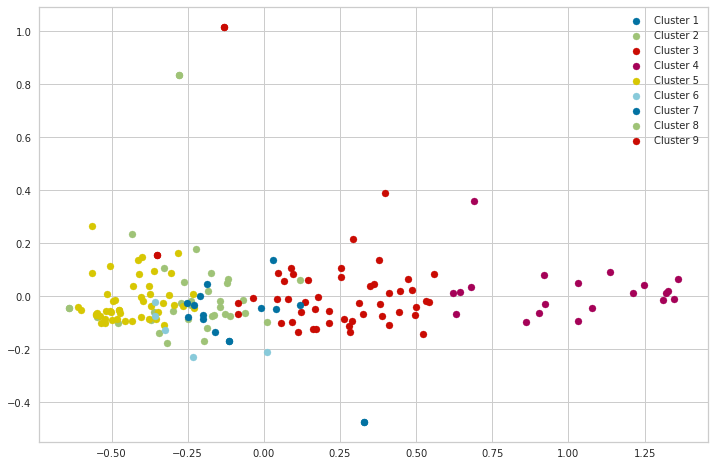

In [238]:
pca_2_Visualization = VisualizationData(resulta_pca_2)
pca_2_Visualization.pca_2D(kmeans.km.labels_)

In [239]:
pca_3 = TrainData()
resulta_pca_3 = pca_3.trainPCA(similarity_matrix,n_components=3)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


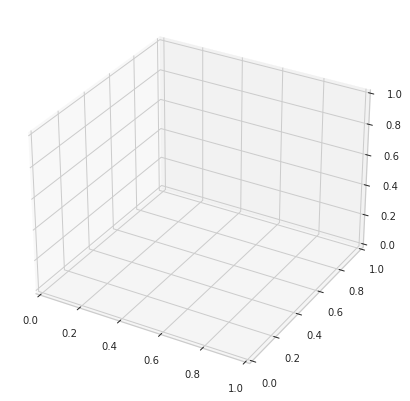

In [240]:
pca_3_Visualization = VisualizationData(resulta_pca_3)
pca_3_Visualization.pca_3D(kmeans.km.labels_,processing.tfidf)

In [242]:
feature_names = processing.tfidf.get_feature_names()
Visualization = VisualizationData(similarity_matrix,feature_names)
Visualization.Top_10_product()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,Product,Similar Products
0,abrasive_cleaner,"[abrasive_cleaner, delete, meat, shopping_bags..."
1,appetizer,"[appetizer, liquor, sauces, jam, soda, candy, ..."
2,artif,"[artif, sweetener, large_milk, instant_coffee,..."
3,baby_cosmetics,"[baby_cosmetics, skin_care, oil, cake_bar, pot..."
4,bakery_product,"[long_life, bakery_product, frozen_fruits, sal..."
...,...,...
171,whisky,"[whisky, flour, dessert, fruitvegetable_juice,..."
172,white_bread,"[white_bread, bottled_water, root_vegetables, ..."
173,white_wine,"[white_wine, small_milk, yogurt, other_vegetab..."
174,yogurt,"[yogurt, small_milk, large_milk, med_milk, rol..."
